In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="Set2")

При решении задания используйте `sklearn`. Пропишите сюда необходимые импорты

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


Скоро весна и лето &mdash; идеальное время года для путешествий и прогулок на велосипедах. В крупных городах обычно развиты сети проката велосипедов или самокатов, предоставляющие удобный сервис. Одной из важных задач таких компаний является прогнозирование количества арендованных велосипедов в зависимости от времени года и погодных условий.

Рассмотрим датасет <a target="_blank" href="https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset">Bike Sharing Dataset</a> от компании <a target="_blank" href="https://www.capitalbikeshare.com/">Capital Bikeshare</a>, располагающей автоматизированными пунктами проката велосипедов. В датасете по дням записаны календарная информация и погодные условия, а также число прокатов в этот день. Цель &mdash; предсказать количество арендованных велосипедов по остальным характеристикам.

<img src="https://thetahat.ru/files/ad/main/3/bike1.jpeg">

Будем работать только со следующими признаками:
* `season`: время года: 1 &mdash; зима, 2 &mdash; весна, 3 &mdash; лето, 4 &mdash; осень;
* `mnth`: месяц от 1 до 12;
* `holiday`: является ли текущий день праздничным;
* `weekday`: день недели от 0 до 6;
* `workingday`: является ли текущий день рабочим или выходным;
* `weathersit`: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман);
* `temp`: температура в Цельсиях;
* `atemp`: температура по ощущениям в Цельсиях;
* `hum`: влажность воздуха;
* `windspeed`: скорость ветра;
* `cnt`: количество арендованных велосипедов в текущий день.

---

Скачайте данные, загрузите их с помощью `pandas` и разделите на обучающую и тестовую части в соотношении 4:1. Далее всю аналитику необходимо проводить только на обучающей части данных.

In [8]:
df = pd.read_csv('day.csv')

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

df_train = train_df.copy()
df_train.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
682,683,2012-11-13,4,1,11,0,2,1,2,0.343333,0.323225,0.662917,0.342046,327,3767,4094
250,251,2011-09-08,3,0,9,0,4,1,3,0.633913,0.555361,0.939565,0.192748,153,1689,1842
336,337,2011-12-03,4,0,12,0,6,0,1,0.299167,0.310604,0.612917,0.095783,706,2908,3614
260,261,2011-09-18,3,0,9,0,0,0,1,0.507500,0.490537,0.695000,0.178483,1353,2921,4274
543,544,2012-06-27,3,1,6,0,3,1,1,0.697500,0.640792,0.360000,0.271775,1077,6258,7335


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 7e2346d718d374e3f957928b573e2a30 -->
#### 1. Визуальный анализ

Посмотрите по графикам, как *целевой признак зависит от остальных* и поймите характер этой зависимости. Старайтесь строить информативные графики, а из финального решения убирать те, которые не пригодились.

Какие признаки категориальные, а какие &mdash; вещественные? Учтите это при построении информативных графиков.

*Указание*. Среди признаков есть такие, значения которых как-то упорядочены, и их относительно небольшое количество. Чтобы понять, являются ли они категориальными, попробуйте понять, как с их значениями будут работать линейные модели. Иначе говоря, допустимо ли с точки зрения природы данных выполнять арифметические операции между *любыми* значениями этого признака, согласуется ли это со смыслом, который несет в себе данный признак?

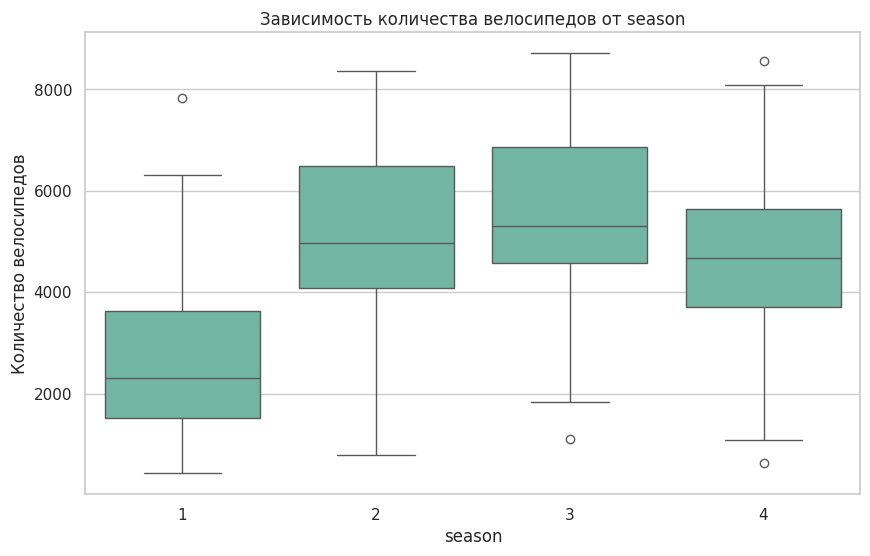

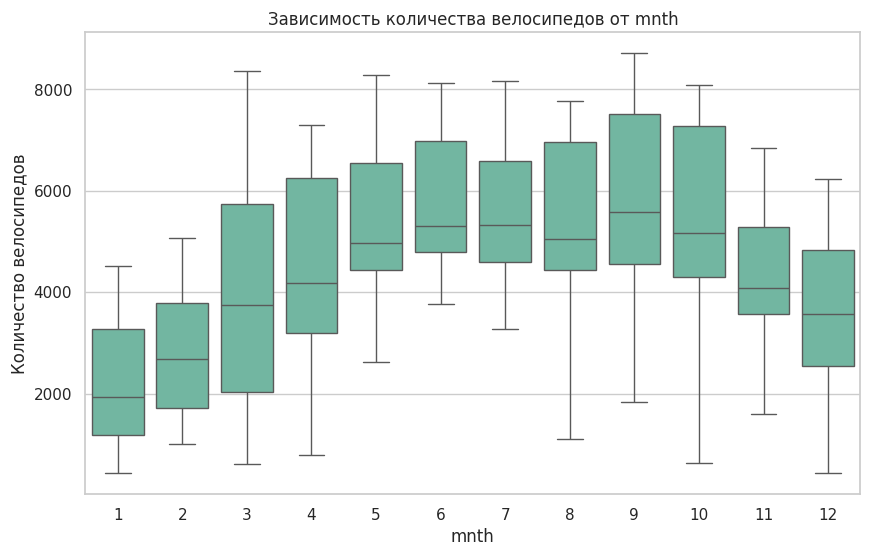

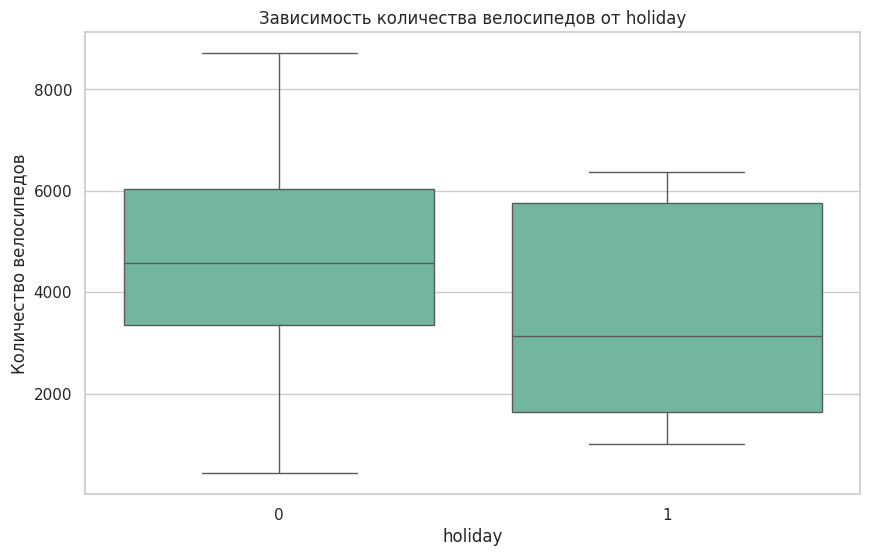

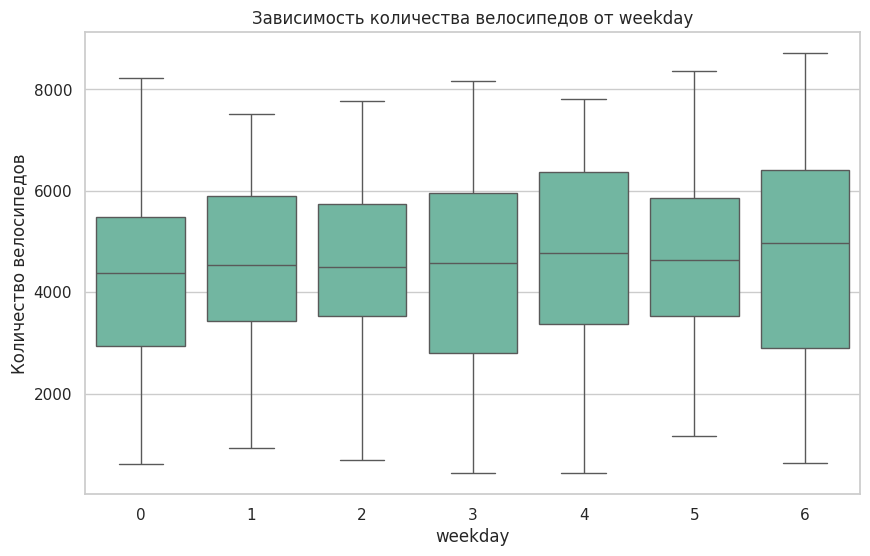

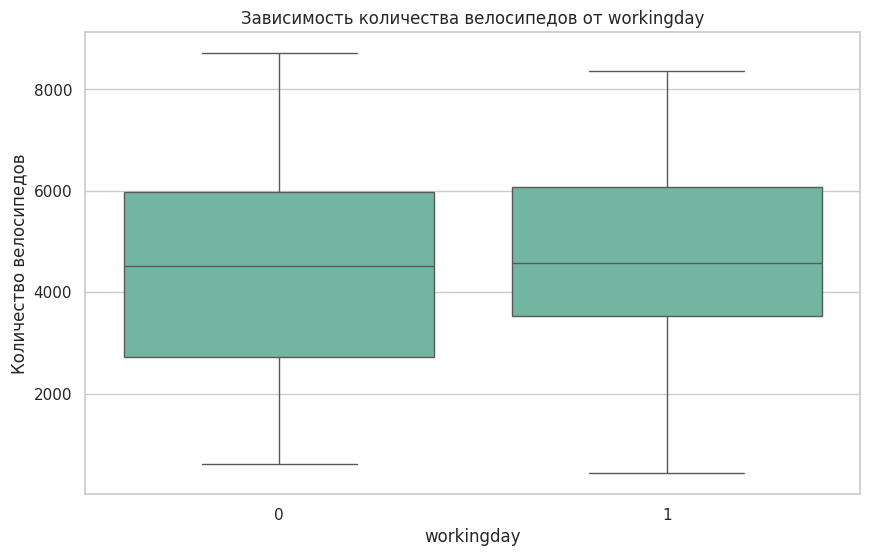

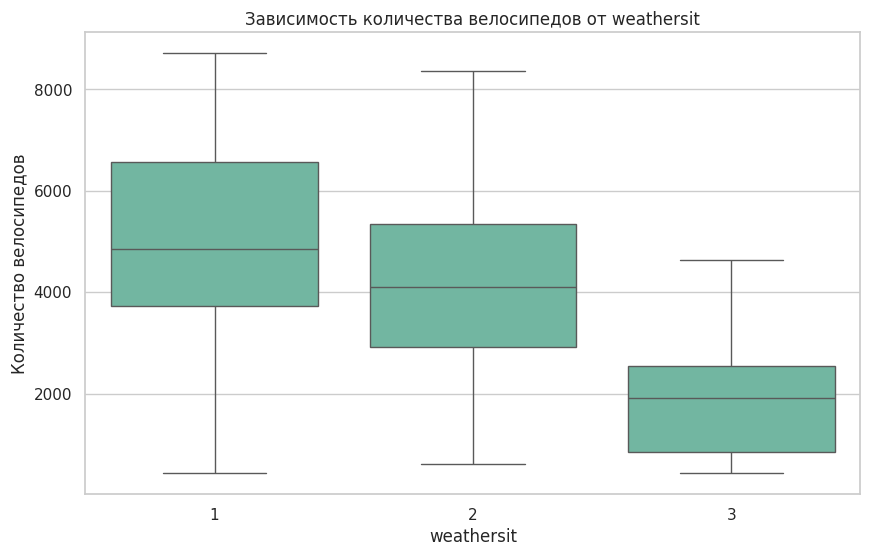

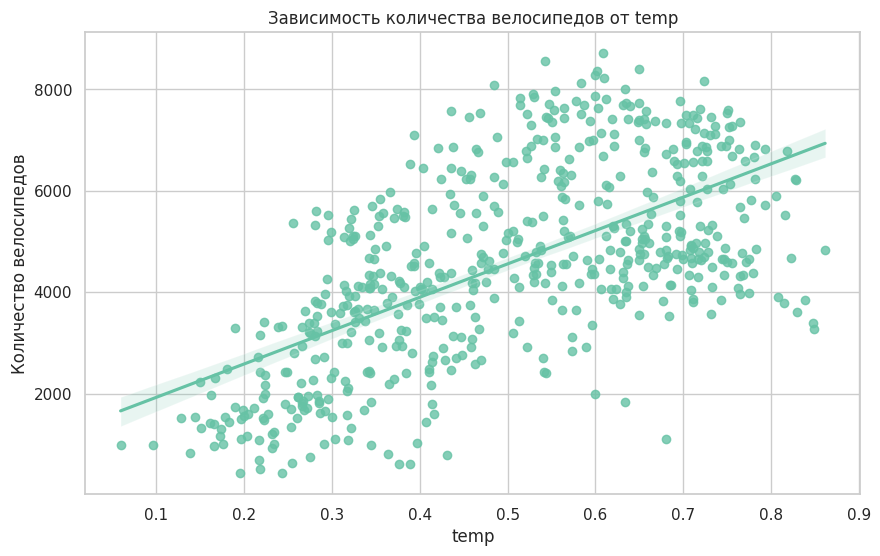

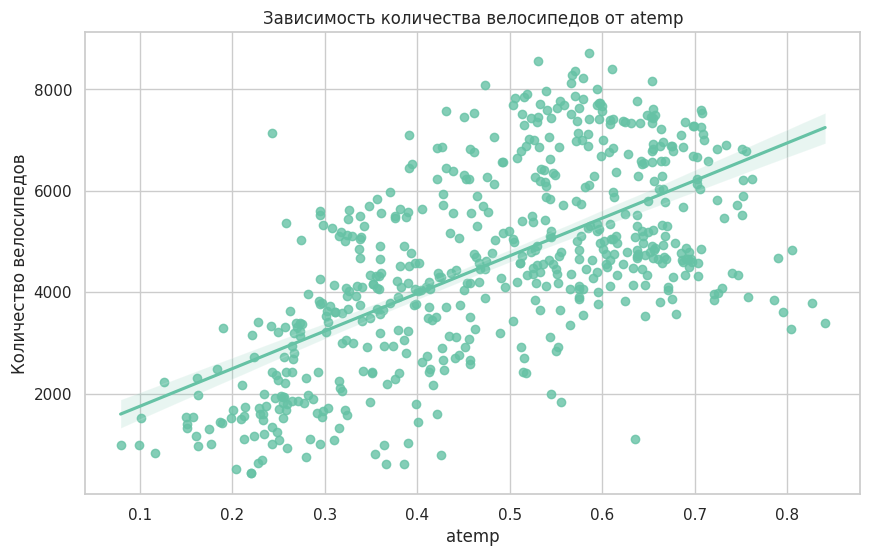

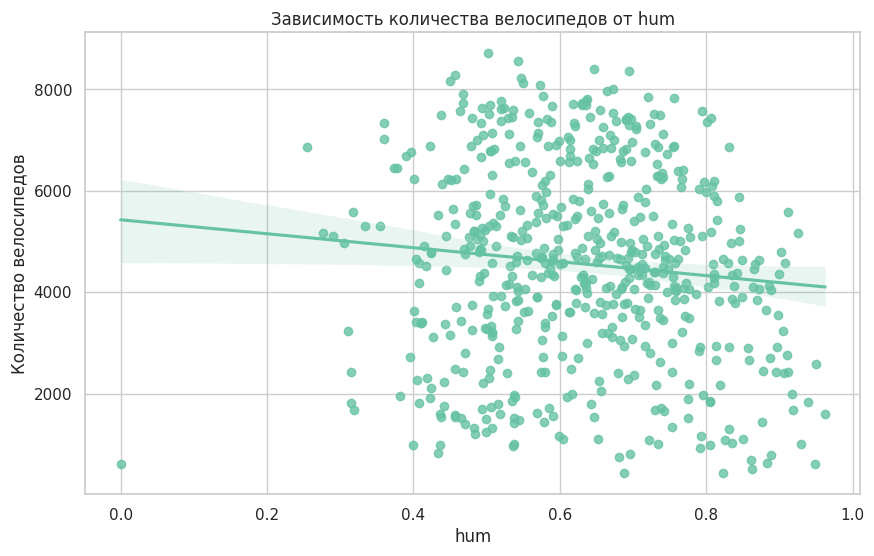

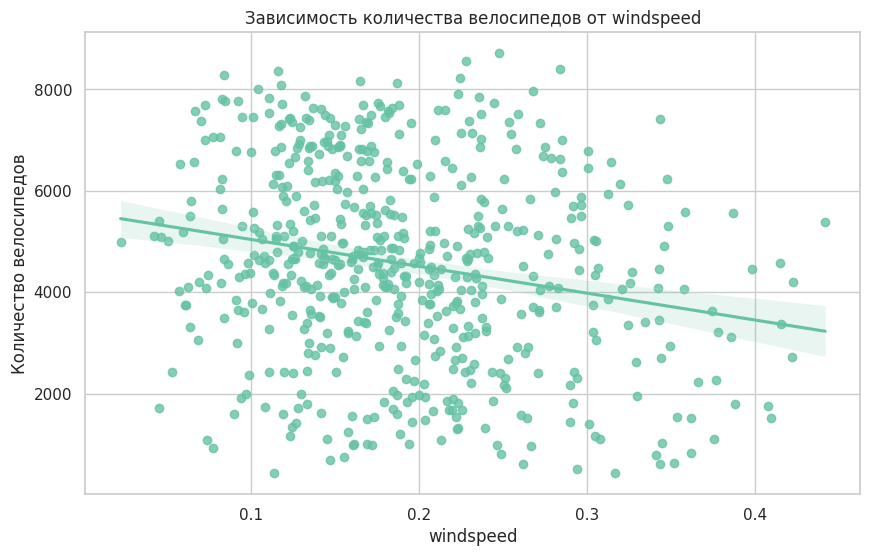

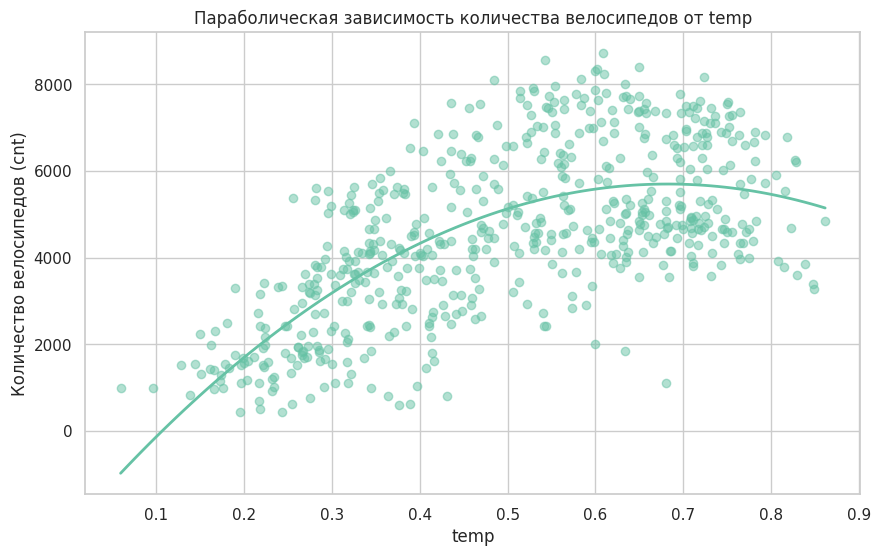

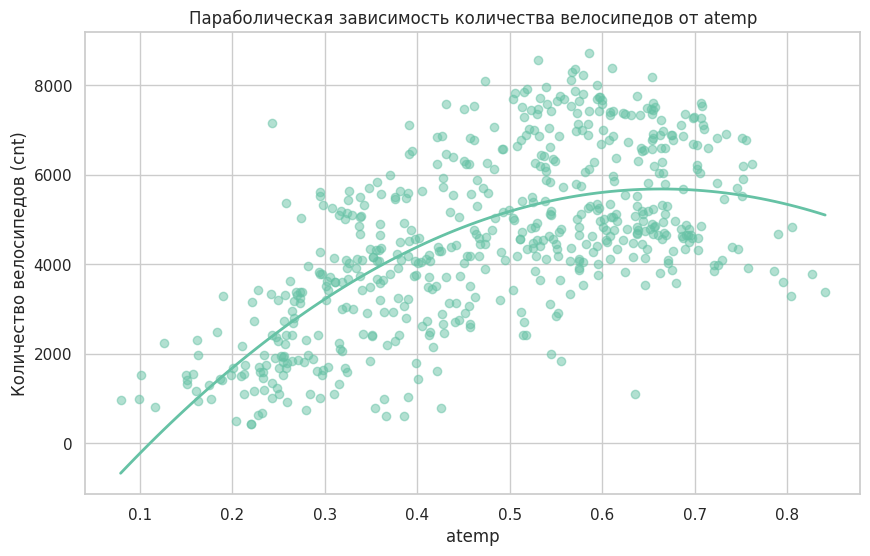

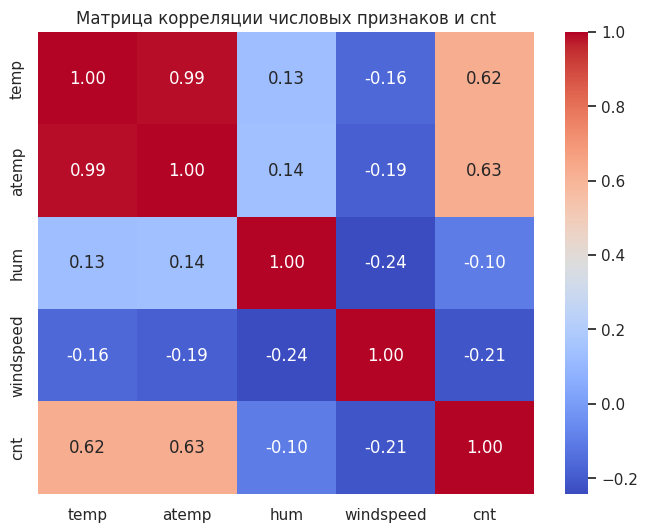

In [ ]:
categorical_features = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
numerical_features = ['temp', 'atemp', 'hum', 'windspeed']

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=feature, y='cnt', data=df_train)
    plt.title(f'Зависимость количества велосипедов от {feature}')
    plt.xlabel(feature)
    plt.ylabel('Количество велосипедов')
    plt.show()

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.regplot(x=feature, y='cnt', data=df_train)
    plt.title(f'Зависимость количества велосипедов от {feature}')
    plt.xlabel(feature)
    plt.ylabel('Количество велосипедов')
    plt.show()

def plot_parabolic(df, feature, target='cnt'):
    coeffs = np.polyfit(df[feature], df[target], 2)
    poly_func = np.poly1d(coeffs)

    x_vals = np.linspace(df[feature].min(), df[feature].max(), 100)
    y_vals = poly_func(x_vals)

    plt.figure(figsize=(10, 6))
    plt.scatter(df[feature], df[target], alpha=0.5)
    plt.plot(x_vals, y_vals,  linewidth=2)
    plt.title(f'Параболическая зависимость количества велосипедов от {feature}')
    plt.xlabel(feature)
    plt.ylabel('Количество велосипедов (cnt)')
    plt.grid(True)
    plt.show()

plot_parabolic(df_train, 'temp')
plot_parabolic(df_train, 'atemp')

correlation_matrix = df_train[numerical_features + ['cnt']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляции числовых признаков и cnt')
plt.show()

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 4c1edb365b02e434e38deeb52b2096fa -->
Сделайте выводы по графикам. В частности, ответьте на следующие вопросы.
* Есть ли в данных явные выбросы, то есть точки, далеко находящиеся от основной массы точек?
* Стоит ли рассматривать какие-либо нелинейные функции от признаков? Не стоит придумывать сложные функции, достаточно рассмотреть $x^2$, $\log x$.



**Выводы по графикам:** Присутствует небольшое количество выбросов. Для признаков температуры имеет смысл использовать параболическую зависимость. temp и atemp значат одно и тоже, поэтому имеет смысл выбрать atemp люди чаще ориентируются на ощущения температуры

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- e5fcb54a72af33e2c09b66124e63e5fc -->
#### 2. Подготовка данных

Опишите по шагам процедуру предобработки данных, которая будет включать работу с выбросами, преобразования вещественных и категориальных признаков, возможно, создание каких-либо новых признаков (посмотрите пример из лекции). То, как именно выполнять подготовку данных, является целым исскуством. Здесь нет "правильного" подхода, здесь есть метрика качества на тестовом множестве, которая в последствии оценит качество вашей модели.

*Обратите внимание, от того, насколько качественно вы проведете визуальный анализ и подготовку данных, будет зависеть качество вашей модели на следующих шагах.*

**Процедура предобработки данных:**

**a).** Анализ графиков зависимостей

**b).** Обнаружение выбросов

**c).** Обнаружение зависимостей вещественных признаков

**d).** Обработка выбросов

**e).** Преобразование признаков

**f).** Удаление неинформативных признаков

**g).** Маштабирование вещественных признаков

Реализуйте данную процедуру.

In [9]:
def handle_outliers_iqr(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[feature] = np.where(df[feature] < lower_bound, lower_bound, df[feature])
    df[feature] = np.where(df[feature] > upper_bound, upper_bound, df[feature])

# Обработка выбросов
handle_outliers_iqr(df_train, 'season')

# Преобразование признаков
df_train['atemp_squared'] = df_train['atemp']**2

# Удаление неинформативных признаков
df_train = df_train.drop(['temp'], axis=1)

categorical_features = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
df_train = pd.get_dummies(df_train, columns=categorical_features, drop_first=True)

# 5. Удаление неинформативных признаков
df_train = df_train.drop(['windspeed', 'hum', 'dteday'], axis=1)

# 6. Масштабирование вещественных признаков
numerical_features = ['atemp', 'atemp_squared']
scaler = StandardScaler()
df_train[numerical_features] = scaler.fit_transform(df_train[numerical_features])

df_train.head()

,instant,yr,atemp,casual,registered,cnt,atemp_squared,season_2.0,season_3.0,season_4.0,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
682,683,1,-0.961525,327,3767,4094,-0.989352,False,False,True,...,False,False,True,False,False,False,False,True,True,False
250,251,0,0.475581,153,1689,1842,0.350323,False,True,False,...,False,False,False,False,True,False,False,True,False,True
336,337,0,-1.039659,706,2908,3614,-1.041898,False,False,True,...,False,False,False,False,False,False,True,False,False,False
260,261,0,0.074269,1353,2921,4274,-0.095024,False,True,False,...,False,False,False,False,False,False,False,False,False,False
543,544,1,1.004466,1077,6258,7335,1.021558,False,True,False,...,False,False,False,True,False,False,False,True,False,False


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- c5124704b109dacbd9cf5647f50eb72c -->
#### 3. Обучение модели и ее анализ

Обучите линейную регрессию из `sklearn` на полученных данных и посмотрите на полученные оценки коэффициентов (в т.ч. свободный коэффициент).

In [10]:
df_test = test_df.copy()
handle_outliers_iqr(df_test, 'season')
df_test['atemp_squared'] = df_test['atemp']**2
df_test = df_test.drop(['temp'], axis=1)
df_test = pd.get_dummies(df_test, columns=categorical_features, drop_first=True)
df_test = df_test.drop(['windspeed', 'hum', 'dteday'], axis=1)
df_test[numerical_features] = scaler.transform(df_test[numerical_features])

X_train = df_train.drop('cnt', axis=1)
y_train = df_train['cnt']

model = LinearRegression()
model.fit(df_train, y_train)

print("Коэффициенты модели:")
for feature, coef in zip(X_train.columns, model.coef_):
    print(f"{feature}: {coef}")
print(f"Свободный коэффициент (intercept): {model.intercept_}")

Коэффициенты модели:
instant: 1.7957259046201765e-15
yr: -1.0180745135812685e-13
atemp: -9.264007292576115e-14
casual: 0.33333333333333365
registered: 0.33333333333333326
atemp_squared: 0.6666666666666669
season_2.0: 3.0829105540832715e-14
season_3.0: 7.541716026396332e-14
season_4.0: -1.0804533014150348e-13
mnth_2: -4.009683845130682e-14
mnth_3: 2.62837405217485e-14
mnth_4: 1.1963242668701551e-14
mnth_5: -3.4300961487922707e-16
mnth_6: 1.1624198198841257e-14
mnth_7: 2.3793930649757873e-14
mnth_8: 2.3144069829650844e-13
mnth_9: 2.7382431858207497e-13
mnth_10: 2.8288912960186194e-13
mnth_11: 2.8419226946242195e-13
mnth_12: 2.816605388050557e-13
holiday_1: 3.0641386373738214e-13
weekday_1: 1.886438734120989e-14
weekday_2: 6.9668298975406225e-15
weekday_3: -1.2716567047017487e-15
weekday_4: -1.9570774173341757e-14
weekday_5: 3.500048134755544e-14
weekday_6: 1.8101647830613666e-14
workingday_1: 2.1774769148690497e-14
weathersit_2: 2.0362162138159133e-14
weathersit_3: -7.12721982126796e-15


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 0e8e860f57fc7df75f236442f7206c78 -->
Посчитайте ошибку предсказания на тестовой выборке по метрикам RMSE, MAE, MAPE.

*Замечание.* Если в тестовой части тоже есть "большие" выбросы, их стоит убрать. Наша модель не должна пытаться их предсказать (например, сбои в работе сервиса) но в то же время выбросы вносят существенный вклад в значение метрики. Особенно стоит обратить на это внимание в случае высоких значений метрик.

In [ ]:
X_test = df_test.drop('cnt', axis=1)
y_test = df_test['cnt']

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_value = mape(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape_value}")

RMSE: 1.2383057003215161e-12
MAE: 1.014287671237411e-12
MAPE: 9.321565541079168e-14


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 52266029600cdfda3b1cfce9e68f5c99 -->
Сделайте выводы.

**Выводы:**
Точность получившейся модели очень высокая

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 00000000000000000000000000000000 -->
*Замечание.* Не расстраивайтесь, если у вас получится не очень хорошее качество, это нормально. Вы провели только небольшую предобработку данных и обучили *простую* модель. Более сложные методы обработки данных и обучения ждут вас впереди. Главное &mdash; с чего-то начать!

<img src="https://thetahat.ru/files/ad/main/3/bike2.png">